<h1>Kernel Functions</h1>

<p>Previously I mentioned that the weights $w$ of the SVM only depend on inner products of vectors.  Additionally, we could only learn a hyperplane (line) in the dimensions we had.  Introducing slack variables and the soft margin SVM helped with misclassification, but what if the problem is inherently nonlinear?</p>


Consider the dataset below on a more familiar linear model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

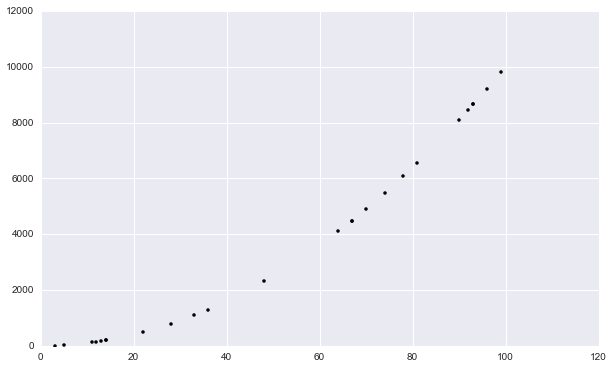

In [2]:
X = np.random.randint(0, 100, 25)
Y = np.square(X) + 1

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(X, Y, s=10, color="black")
plt.xlim(0)
plt.ylim(0)
plt.show()

<p>Clearly the above function is nonlinear in X (we know this for sure because we can see the true function).  If we simply attempt to use a linear model as is, we will get a rather poor fit</p>

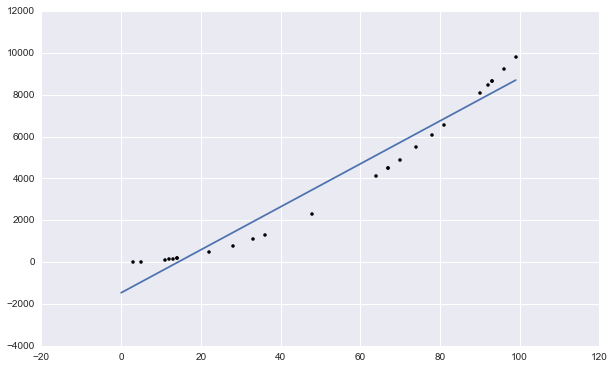

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
Xm = np.zeros((25, 2))
Xm[:, 1] = X
Xm[:, 0] = 1
reg.fit(Xm, Y)

Domain = np.zeros((100, 2))
Domain[:, 1] = np.linspace(0, 100, 100)
Domain[:, 0] = 1
Prediction = reg.predict(Domain)

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(X, Y, s=10, color="black")
plt.plot( Prediction)
plt.xlim()
plt.ylim()
plt.show()

<p>One of the solutions to the above problems in linear models is basis expansion:  Add the term $x^2$ to the model so that it is linear in the new basis</p>

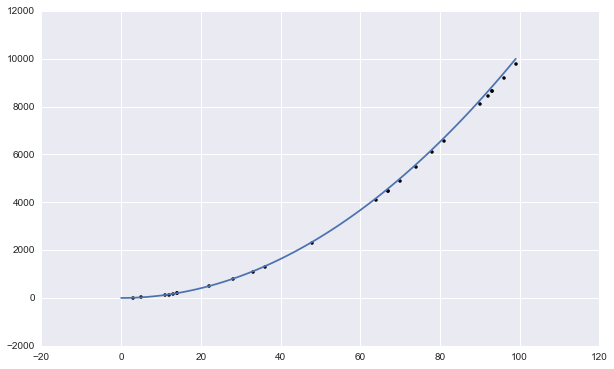

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
Xm = np.zeros((25, 3))
Xm[:, 1] = X
Xm[:, 0] = 1
Xm[:, 2] = np.square(X)
reg.fit(Xm, Y)

Domain = np.zeros((100, 3))
Domain[:, 1] = np.linspace(0, 100, 100)
Domain[:, 0] = 1
Domain[:, 2] = np.square(Domain[:,1])
Prediction = reg.predict(Domain)

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(X, Y, s=10, color="black")
plt.plot( Prediction)
plt.xlim()
plt.ylim()
plt.show()

<p>We'll present a similar solution to nonlinearity in SVMs:  If the problem is not linear in the given dimension, it may be linear in a higher dimension.  However the unique property of SVMs (and several other techniques) allows for something called the 'kernel trick'</p>

<h2>The Kernel Trick</h2>

The kernel trick avoids the explicit mapping that we used above to get linear algorithms to learn a nonlinear function.  There exist certain functions $k(x_1,x_2)$ which express the inner product of the vectors $x_1$ and $x_2$, but in an implicit higher dimensional (possibly infinite) space.

$$K(x, y) = \langle\,\phi(x),\phi(y)\rangle\ $$

Where $\phi$ would be some basis expansion that we might normally do manually

<h3>The Polynomial Kernel</h3>
For a degree d polynomial, the polynomial kernel function is

$$K(x, y) = (x^Ty + c)^d$$

The (implicit) feature space of a polynomial kernel is equivalent to that of polynomial regression, but without the combinatorial blowup in the number of parameters to be learned. When the input features are binary, then the features correspond to logical conjunctions of input features

The Nature of this function can be more closely examined with an expansion of $d=2$ and $n=2$.

$$K(x, y) = (\sum_{i=1}^n x_iy_i + c)^2 = \sum_{i=1}^n(x_i^2)(y_i^2) + \sum_{i=2}^n\sum_{j=1}^{i-1}(\sqrt{2}x_ix_j)(\sqrt{2}y_iy_j) + \sum_{i=1}^n (\sqrt{2}cx_i)(\sqrt{2}cy_i) + c^2$$ 

$$K(x, y) = (\sum_{i=1}^2 x_iy_i + c)^2 = \sum_{i=1}^2(x_i^2)(y_i^2) + (\sqrt{2}x_ix_j)(\sqrt{2}y_iy_j) + \sum_{i=1}^2 (\sqrt{2}cx_i)(\sqrt{2}cy_i) + c^2$$ 

$$K(x, y) = (\sum_{i=1}^2 x_iy_i + c)^2 = x_1^2y_1^2 + x_2^2y_2^2 + 2x_1x_2y_1y_2 + 2c^2x_1y_1 + 2c^2x_2y_2 + c^2$$

Or in terms of a basis expansion

$$\phi(x) = (x_1^2, x_2^2, \sqrt{2}x_1x_2, \sqrt{2c}x_1, \sqrt{2c}x_2, c)$$

c is a free parameter which controlls the influence of higher order versus lower order polynomials.

While the Radial Basis Kernel is more popular in SVMs, the polynomial kernel is freqently used in NLP problems with $d=2$.


Consider the problem below (nonlinearly separable)

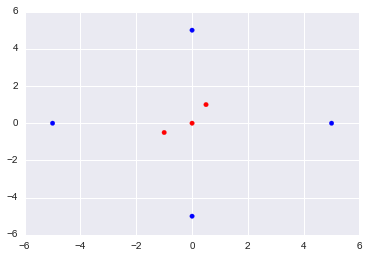

In [5]:
from sklearn.svm import SVC

X = 5 * np.array([[0, 0],[0.1, 0.2],[-0.2, -0.1],[0 , 1],[0, -1], [1, 0], [-1, 0]])
Y = np.array([1, 1, 1, 0, 0, 0, 0])
C = ['red','red','red','blue','blue','blue','blue']
plt.scatter(X[:,0],X[:,1], color=C)
plt.show()

0.5714285714285714

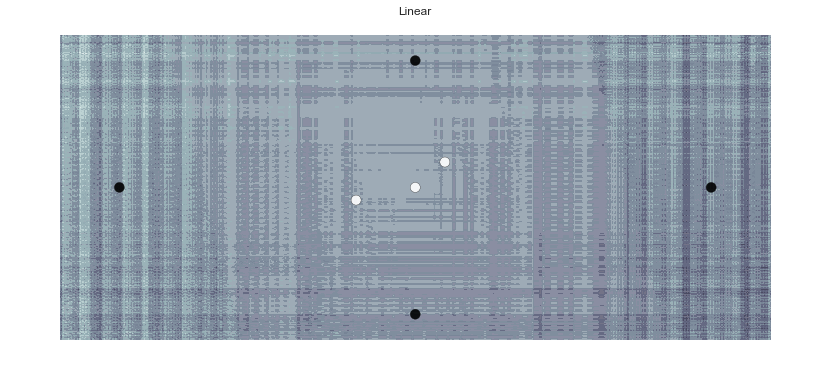

In [6]:
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=Y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone)

    axis.axis('off')
    axis.set_title(title)
    


clf = SVC(kernel="linear")
clf.fit(X, Y)


fig, axes = plt.subplots(1, 1, figsize=(14, 6))
plot_decision_function(clf, 1, axes, "Linear")
clf.score(X, Y)

1.0

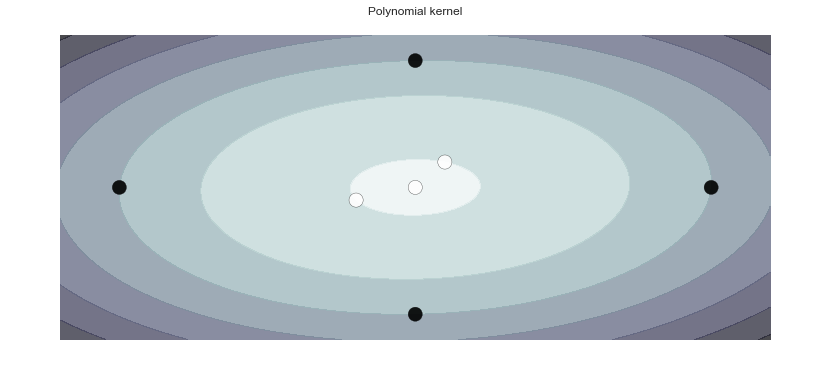

In [7]:
clf = SVC(kernel="poly", degree=2, coef0=1)
clf.fit(X, Y)

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
plot_decision_function(clf, 2, axes, "Polynomial kernel")
clf.score(X, Y)

<p>Above we can see that using a polynomial kernel allows the SVM to correctly classify all of the points with a nonlinear(in the original space) decision boundary- while the linear svm produces garbage results.

<h3>Additional Notes</h3>

When $c = 0$ the kernel is called homogeneous,and we can simplify the above expansion to


$$K(x, y) = (\sum_{i=1}^n x_iy_i + c)^2 = x_1^2y_1^2 + x_2^2y_2^2 + 2x_1x_2y_1y_2$$

I'm still looking into the usefull diferences, for instance in sklearn the default polynomial kernel is homogeneous

<h3>Gaussian Kernel</h3>
For any constant $\sigma > 0$,a Gaussian Kernel or Radial Basis Function (RBF) is

$$\forall x, y \in R^N, \ K(x, y) = exp(-\frac{||y - x||^2}{2\sigma^2}) $$

Gaussian kernels are the most popular kernels in applications.  Consider the kernel $K'(x, y) = exp(\frac{x \cdot y}{\sigma^2})$.  Using the power series expansion of the exponential function, we can rewrite the above as

$$\forall x, y \in R^n, \ K'(x, y) = \sum_{n=0}^{\infty}\frac{(x \cdot y)^n}{\sigma^{2n}n!}$$

Which shows (according to the book im using) that the Kernels $K'$ and thus Gaussian kernels are positive linear combinations of polynomial kernels of all degrees $n \geq 0$

The gaussian Kernel is based on the idea of radial basis functions - intuitively they select smooth solutions by drawing hyperspheres.  Unlike other kernels, with a small enough sigma they can overfit by wrapping very tightly around each data point

1.0

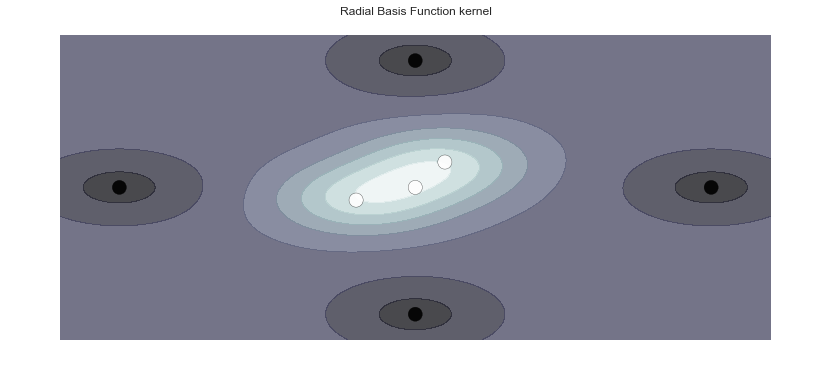

In [8]:
clf = SVC(kernel="rbf")
clf.fit(X, Y)

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
plot_decision_function(clf, 2, axes, "Radial Basis Function kernel")
clf.score(X, Y)

Intuitively, the RBF kernel classifies based on hyperspheres

<h3>Sigmoid Kernel</h3>
For any real constants $a, b \geq 0$, a sigmoid kernel is the kernel K defined over $R^N$ by

$$K(x, y) = tanh(a(x \cdot y) + b)  $$

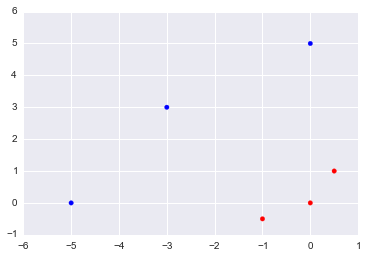

In [15]:

X = 5 * np.array([[0, 0],[0.1, 0.2],[-0.2, -0.1],[0 , 1], [-1, 0], [-0.6, 0.6]])
Y = np.array([1, 1, 1, 0, 0, 0])
C = ['red','red','red','blue','blue', 'blue']
plt.scatter(X[:,0],X[:,1], color=C)
plt.show()

1.0

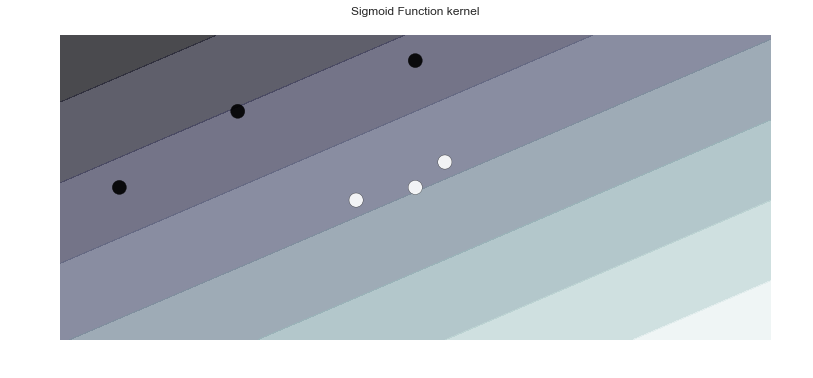

In [25]:
clf = SVC(kernel="sigmoid", coef0=1, gamma=0.0001)
clf.fit(X, Y)

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
plot_decision_function(clf, 2, axes, "Sigmoid Function kernel")
clf.score(X, Y)

1.0

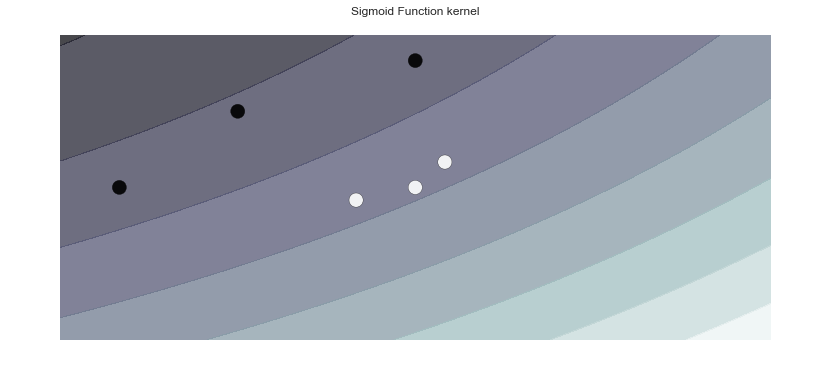

In [27]:
clf = SVC(kernel="sigmoid", coef0=1, gamma=0.01)
clf.fit(X, Y)

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
plot_decision_function(clf, 2, axes, "Sigmoid Function kernel")
clf.score(X, Y)

0.66666666666666663

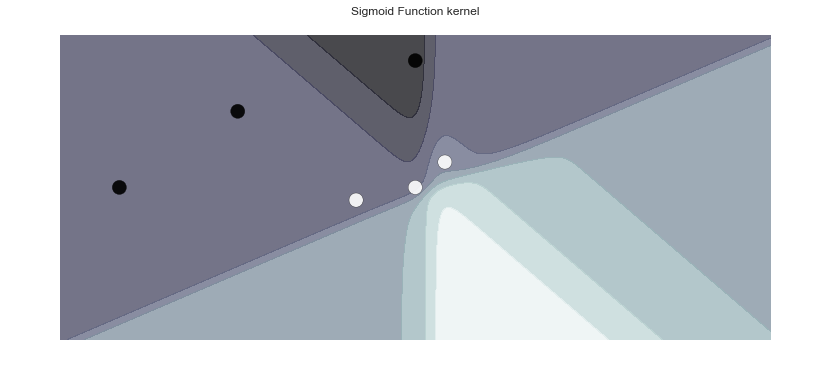

In [28]:
clf = SVC(kernel="sigmoid", coef0=1, gamma=1)
clf.fit(X, Y)

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
plot_decision_function(clf, 2, axes, "Sigmoid Function kernel")
clf.score(X, Y)

<p>The parameters $a$ and $b$ must be chosen (gamma and coef in sklearn) via cross validation - note how changing the value of gamma(a) in the function distorts the decision boundary</p>